Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    RocCurveDisplay,
    accuracy_score,
    classification_report
)

Menghubungkan Colab dengan Google Drive

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Memanggil Dataset Gdrive

In [10]:
path = "/content/drive/MyDrive/Machine_Learning/praktikum4/data"

Membaca Dataset

In [13]:
import pandas as pd
df = pd.read_csv(path + "/calonpembelimobil.csv")
df.head()

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
0,1,32,1,0,0,240,1
1,2,49,2,1,1,100,0
2,3,52,1,0,2,250,1
3,4,26,2,1,1,130,0
4,5,45,3,0,2,237,1


 Melihat informasi

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ID              1000 non-null   int64
 1   Usia            1000 non-null   int64
 2   Status          1000 non-null   int64
 3   Kelamin         1000 non-null   int64
 4   Memiliki_Mobil  1000 non-null   int64
 5   Penghasilan     1000 non-null   int64
 6   Beli_Mobil      1000 non-null   int64
dtypes: int64(7)
memory usage: 54.8 KB


 Cek missing value

In [15]:
df.isnull().sum()

,0
ID,0
Usia,0
Status,0
Kelamin,0
Memiliki_Mobil,0
Penghasilan,0
Beli_Mobil,0


Memeriksa nilai unik tiap kolom

In [16]:
print("Nilai unik kolom 'Status':", df['Status'].unique())
print("Nilai unik kolom 'Kelamin':", df['Kelamin'].unique())
print("Nilai unik kolom 'Memiliki_Mobil':", df['Memiliki_Mobil'].unique())
print("Nilai unik kolom 'Beli_Mobil':", df['Beli_Mobil'].unique())

Nilai unik kolom 'Status': [1 2 3 0]
Nilai unik kolom 'Kelamin': [0 1]
Nilai unik kolom 'Memiliki_Mobil': [0 1 2 4 3]
Nilai unik kolom 'Beli_Mobil': [1 0]


Mapping kolom kategori ke dalam bentuk numerik

In [17]:
# 1. maping kolom Beli_Mobil menjadi biner
map_beli = {'Beli': 1, 'Ya': 1, 'Tidak': 0, 'Tidak Beli': 0}
df['Beli_Mobil_bin'] = df['Beli_Mobil'].map(map_beli).astype('Int64')

# 2. maping kolom Kelamin menjadi biner
# 'Laki-laki' : 1, 'Perempuan' : 0
df['Kelamin_bin'] = (df['Kelamin'] == 'Laki-laki').astype(int)

print("Distribusi Beli_Mobil_bin:\n", df['Beli_Mobil_bin'].value_counts())
print("\nDistribusi Kelamin_bin:\n", df['Kelamin_bin'].value_counts())


Distribusi Beli_Mobil_bin:
 Series([], Name: count, dtype: Int64)

Distribusi Kelamin_bin:
 Kelamin_bin
0    1000
Name: count, dtype: int64


Analisi korelasi antar variabel

In [18]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix


,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil,Beli_Mobil_bin,Kelamin_bin
ID,1.000000,0.149779,-0.006634,0.014646,0.068555,0.254177,0.168614,NaN,NaN
Usia,0.149779,1.000000,0.051476,0.019454,0.090926,0.125859,0.100127,NaN,NaN
Status,-0.006634,0.051476,1.000000,-0.008561,0.048302,0.071714,0.048584,NaN,NaN
Kelamin,0.014646,0.019454,-0.008561,1.000000,0.035199,-0.054211,-0.147301,NaN,NaN
Memiliki_Mobil,0.068555,0.090926,0.048302,0.035199,1.000000,0.137823,0.102005,NaN,NaN
Penghasilan,0.254177,0.125859,0.071714,-0.054211,0.137823,1.000000,0.763930,NaN,NaN
Beli_Mobil,0.168614,0.100127,0.048584,-0.147301,0.102005,0.763930,1.000000,NaN,NaN
Beli_Mobil_bin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kelamin_bin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Membuat heatmap grafik

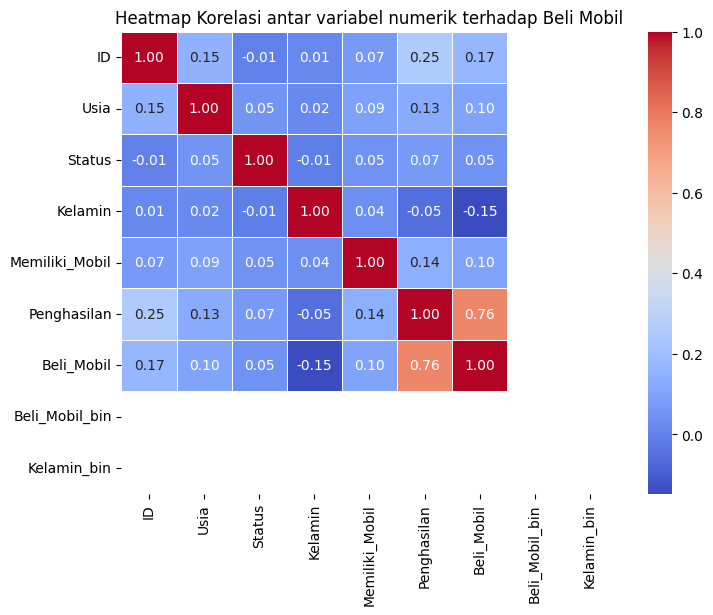

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f" , linewidths=0.5)
plt.title("Heatmap Korelasi antar variabel numerik terhadap Beli Mobil")
plt.show()

Menentukan fitur target

In [51]:
df['Beli_Mobil_bin'] = df['Beli_Mobil']  # target biner

# fitur numerik & kategorikal (gabung semua yang kamu mau)
feature_num = ['Usia', 'Penghasilan']
feature_cat = ['Status', 'Kelamin', 'Memiliki_Mobil']

# ambil data yang lengkap
df_model = df[feature_num + feature_cat + ['Beli_Mobil_bin']].dropna()

# pisahin X dan y
X = df_model[feature_num + feature_cat].copy()
y = df_model['Beli_Mobil_bin'].copy()

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (1000, 5)
y shape: (1000,)


Pembagian dataset Training dan Testing

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("data latih:", X_train.shape, y_train.shape)
print("data uji:", X_test.shape, y_test.shape)

data latih: (800, 5) (800,)
data uji: (200, 5) (200,)


Pembuatan model Logistic Regresion

In [53]:
model = LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42)
model.fit(X_train, y_train)
print("Model Logistic Regression berhasil dilatih.")

Model Logistic Regression berhasil dilatih.


 Prediksi & probabilitas

In [54]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Prediksi & probabilitas
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print(f"Akurasi: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_prob):.4f}")

Akurasi: 0.9400
Precision: 0.9675
Recall: 0.9370
F1-score: 0.9520
ROC AUC: 0.9778


Visualisasi Hasil Evaluasi


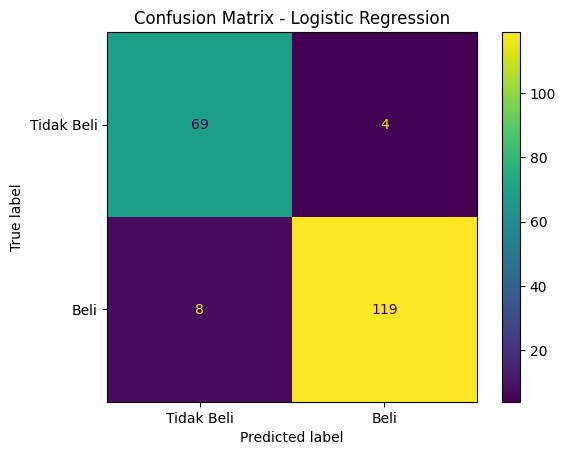

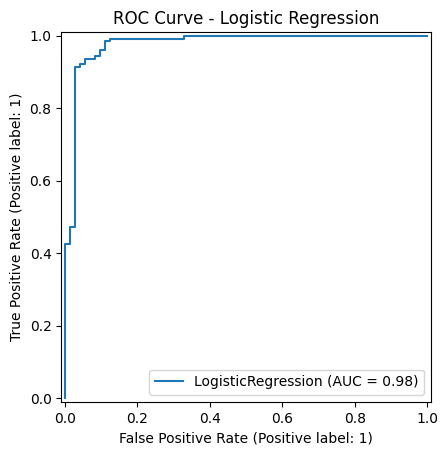

In [55]:
# Confusion matrix

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred),
                       display_labels=['Tidak Beli', 'Beli']).plot(values_format='d')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()



# ROC curve

RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title("ROC Curve - Logistic Regression")
plt.show()

Classification Report

In [56]:
print(classification_report(y_test, y_pred, target_names=['Tidak Beli', 'Beli']))

              precision    recall  f1-score   support

  Tidak Beli       0.90      0.95      0.92        73
        Beli       0.97      0.94      0.95       127

    accuracy                           0.94       200
   macro avg       0.93      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200



Lakukan Cross validation

In [57]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)
print("Skor tiap fold:", scores)
print("Rata-rata skor:", np.mean(scores))
print("Standar deviasi:", np.std(scores))

Skor tiap fold: [0.81 0.92 0.97 0.93 0.92]
Rata-rata skor: 0.9100000000000001
Standar deviasi: 0.05329165037789689


Interpretasi Model Logistic Regression

In [59]:
coefs = model.coef_[0]
odds = np.exp(coefs)
coef_df = pd.DataFrame({
    'Fitur': X.columns,
    'Koefisien': coefs,
    'odds_ratio': odds
}).sort_values('odds_ratio', ascending=False)

display(coef_df)


,Fitur,Koefisien,odds_ratio
4,Memiliki_Mobil,0.132413,1.141580
1,Penghasilan,0.059699,1.061517
0,Usia,-0.011144,0.988917
2,Status,-0.185527,0.830667
3,Kelamin,-1.241831,0.288855


Prediksi Data Baru

In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Contoh dataset
data = pd.DataFrame({
    'Usia': [25, 40, 35, 50, 23, 45],
    'Status': [1, 2, 1, 2, 1, 2],
    'Kelamin': [1, 0, 1, 0, 1, 0],
    'Memiliki_Mobil': [0, 1, 0, 1, 0, 1],
    'Penghasilan': [200, 400, 300, 500, 180, 450],
    'Beli_Mobil': [0, 1, 0, 1, 0, 1]
})

# Fitur dan target
X = data.drop('Beli_Mobil', axis=1)
y = data['Beli_Mobil']

# Split data & latih model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# data baru untuk prediksi
data_baru = pd.DataFrame({
    'Usia': [30, 45],
    'Status': [1, 2],
    'Kelamin': [1, 0],
    'Memiliki_Mobil': [0, 1],
    'Penghasilan': [250, 350]
})

# prediksi
pred = clf.predict(data_baru)
prob = clf.predict_proba(data_baru)[:, 1]

# menggabungkan hasil
hasil = data_baru.copy()
hasil['Prob_Beli_Mobil'] = prob
hasil['Pred_Beli_Mobil'] = pred
display(hasil)


,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Prob_Beli_Mobil,Pred_Beli_Mobil
0,30,1,1,0,250,0.05,0
1,45,2,0,1,350,0.83,1
